import os
import random
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Task 1: Iterate over subfolders and count files
subfolders = sorted(next(os.walk('/kaggle/input/stanford-dogs-dataset/images/Images'))[1])
folder_counts = []

for folder in subfolders:
    folder_path = os.path.join('/kaggle/input/stanford-dogs-dataset/images/Images', folder)
    files = os.listdir(folder_path)
    file_count = len(files)
    folder_counts.append((folder, file_count))

df = pd.DataFrame(folder_counts)
df.columns = ['Breed','Count']
categ_2_keep = df.sort_values('Count', ascending=False).Breed[:5].to_list()

import tensorflow as tf
fpath = "/kaggle/input/stanford-dogs-dataset/images/Images"
img_size = 224
batch_size = 32

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    fpath,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_size, img_size),
    color_mode="rgb",
    batch_size=batch_size,
    label_mode="categorical"
)

## https://www.kaggle.com/code/baorbaor/dog-images-classification-using-keras-alexnet

In [1]:
import os
import cv2
import random

from PIL import Image
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
path = "/kaggle/input/stanford-dogs-dataset/images/Images"

categories = os.listdir(path)
random.shuffle(categories)
categories = categories[:120]
labels_ = [cat[10:] for cat in categories]
print("List of categories = ",labels_,"\n\nNo. of categories = ", len(categories))


List of categories =  ['Afghan_hound', 'Scottish_deerhound', 'Australian_terrier', 'French_bulldog', 'malinois', 'Saluki', 'West_Highland_white_terrier', 'Labrador_retriever', 'Brabancon_griffon', 'basenji', 'affenpinscher', 'Sealyham_terrier', 'schipperke', 'Leonberg', 'komondor', 'Kerry_blue_terrier', 'groenendael', 'English_foxhound', 'cocker_spaniel', 'German_short-haired_pointer', 'Greater_Swiss_Mountain_dog', 'Irish_wolfhound', 'malamute', 'African_hunting_dog', 'bull_mastiff', 'Rhodesian_ridgeback', 'pug', 'keeshond', 'Tibetan_terrier', 'beagle', 'Brittany_spaniel', 'German_shepherd', 'Samoyed', 'silky_terrier', 'flat-coated_retriever', 'Cardigan', 'Tibetan_mastiff', 'toy_terrier', 'kuvasz', 'Great_Dane', 'Scotch_terrier', 'Great_Pyrenees', 'papillon', 'kelpie', 'chow', 'Weimaraner', 'Doberman', 'dingo', 'Shetland_sheepdog', 'Mexican_hairless', 'Bernese_mountain_dog', 'Appenzeller', 'Border_terrier', 'Irish_setter', 'Shih-Tzu', 'Irish_terrier', 'basset', 'Welsh_springer_spaniel'

In [4]:
np.arange(3)

array([0, 1, 2])

#### how to use RGB or Grey images
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        random.shuffle(images)
        images = images[:150]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'RGB')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((300, 300))
            
            img_lst.append(np.array(resized_img))
            labels.append(index)
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

In [3]:
### how to use data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (up to 20 degrees)
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest',     # Fill mode for newly created pixels
    data_format='channels_last'
)

            
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in tqdm(enumerate(categories)):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        random.shuffle(images)
        images = images[:5]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'RGB')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((300, 300))
            
            #img_lst.append(np.array(resized_img))
            #labels.append(index)
            
            for i in np.arange(5):             # apply n random transformations
                angmented_img = datagen.random_transform(np.array(resized_img))
                img_lst.append(np.array(resized_img))
                labels.append(index)
            
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

No. of images loaded =  3000 
No. of labels loaded =  3000
<class 'list'> <class 'list'>


0      25
1      25
88     25
87     25
86     25
       ..
35     25
34     25
33     25
32     25
119    25
Length: 120, dtype: int64

### allows to use grey scale image with ImageDataGenerator by ading channels
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (up to 20 degrees)
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest',     # Fill mode for newly created pixels
    data_format='channels_last'
)

            
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in tqdm(enumerate(categories)):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        #random.shuffle(images)
        images = images[:150]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'L')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((300, 300))
            
            
            img_data = np.expand_dims(resized_img, axis=-1)  # to use dataaugmentation in grey scale, Add channel dimension
            img_data = np.repeat(img_data, 3, axis=-1)  # Repeat the single channel to create a multi-channel image
            
            
            img_lst.append(np.array(img_data))
            labels.append(index)
            
            for i in np.arange(3):             # apply 3 random transformations
                angmented_img = datagen.random_transform(np.array(img_data))       # change variable in np.array() if not grey scale
                img_lst.append(np.array(angmented_img))
                labels.append(index)
            
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)

print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

In [ ]:
# check that the classes are equilibrated
to_plot = pd.Series(labels).value_counts()
to_plot.index = labels_
to_plot.plot.pie(labels=to_plot.index, cmap='Set3')   # numpy.round(val/100.*sizes.sum(), 0)

#**************************************************************************************************************
#***************** new loading unction with creating random transofmration of the images **********************
#**************************************************************************************************************
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(path+"/"+category):
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # convert to grey
            img_array = Image.fromarray(img, 'L')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((300, 300))
            img_lst.append(np.array(resized_img))
            labels.append(index)
            
            # transformation of image
            angle = random.uniform(-90, 90)  # Random rotation angle between -30 and 30 degrees
            rotated_img = img_array.rotate(angle)
            img_lst.append(np.array(rotated_img))
            labels.append(index)
                
            translation_x = random.uniform(-20, 20)  # Random translation in the x direction
            translation_y = random.uniform(-20, 20)  # Random translation in the y direction
            translated_img = img_array.transform(img_array.size, Image.AFFINE, (1, 0, translation_x, 0, 1, translation_y))
            img_lst.append(np.array(translated_img))
            labels.append(index)
                
            zoom_factor = random.uniform(0.8, 1.2)  # Random zoom factor between 0.8 and 1.2
            zoomed_img = img_array.resize((int(img_array.width * zoom_factor), int(img_array.height * zoom_factor)))
            img_lst.append(np.array(zoomed_img))
            labels.append(index)
            
            flip_option = random.choice([Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM])
            flipped_img = img_array.transpose(flip_option)
            img_lst.append(np.array(flipped_img))
            labels.append(index)
          
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

In [4]:
print("*** images format ***\n\n",images[1][:2])   # each images is a 2D list of list
print("\n*** labels format ***\n\n",labels[145:165]) # a list of labels
images = np.array(images)
labels = np.array(labels)

print("\nShapes:\nImages shape ",images.shape)
#images = np.mean(images, axis=-1, keepdims=True)        # we add this line to get back to grey scale and limit the number of parameters in the CNN
print("\nShapes:\nImages shape ",images.shape)


print("\n==> Necessary to normalize images' pixels")
images = images.astype(np.float32)                      #### not necessary if using image transfo function ?!?
labels = labels.astype(np.int32)                         #### not necessary ...
images = images/255
print("\n\n*** images format after normalisation ***\n\n",images[1][:2])
print("\nShapes:\nImages shape ",images.shape,"Labels shape = ",labels.shape)

*** images format ***

 [[[ 46  76  64]
  [ 39  69  57]
  [ 54  84  72]
  ...
  [127 138 149]
  [ 77  86 101]
  [  0   0  12]]

 [[ 32  62  53]
  [ 73 103  94]
  [ 65  96  86]
  ...
  [ 64  75  86]
  [128 143 157]
  [ 24  33  48]]]

*** labels format ***

 [5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Shapes:
Images shape  (3000, 300, 300, 3)

Shapes:
Images shape  (3000, 300, 300, 3)

==> Necessary to normalize images' pixels


*** images format after normalisation ***

 [[[0.18039216 0.29803923 0.2509804 ]
  [0.15294118 0.27058825 0.22352941]
  [0.21176471 0.32941177 0.28235295]
  ...
  [0.49803922 0.5411765  0.58431375]
  [0.3019608  0.3372549  0.39607844]
  [0.         0.         0.04705882]]

 [[0.1254902  0.24313726 0.20784314]
  [0.28627452 0.40392157 0.36862746]
  [0.25490198 0.3764706  0.3372549 ]
  ...
  [0.2509804  0.29411766 0.3372549 ]
  [0.5019608  0.56078434 0.6156863 ]
  [0.09411765 0.12941177 0.1882353 ]]]

Shapes:
Images shape  (3000, 300, 300, 3) Labe

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (5 , 5))

    for i in range(9):

        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , i+1)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [5]:
# split to learn model
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size = 0.75, random_state = 42, stratify=labels)

x_train = x_train.astype('float32')
y_train = y_train.astype('int32')

# split to test and to validate
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.4, random_state = 42, stratify=y_test)

x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
y_valid = y_valid.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
print("\nShapes:\nImages shape ",x_train.shape,"Labels shape = ",y_train.shape)

### first model inspired from OCP

In [6]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from keras import regularizers

model=Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300,3), padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten(input_shape=(150,150,32)))

initializer = tf.keras.initializers.GlorotNormal()
model.add(layers.Dense(512,activation="relu", kernel_initializer=initializer))
model.add(layers.Dense(512,activation="relu", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))

model.add(layers.Dense(120,activation="softmax"))

#model.build((None, 300, 300, 3))
model.summary()

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])




#*****************************
#***** ACTIVATION FUNCTION OPTIMISATION ***********
#
# -------> use GeLU: combines dropout (zeroing out neurons randomly for a sparse network), zone out (maintain previous value), and ReLU. It weights inputs by percentile rather than gates, leading to a smoother version of ReLU.
# -------> use Swish:  Can be used as a drop in replacement for ReLU

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 720000)            0         
                                                                 
 dense (Dense)               (None, 512)               368640512 
                                                                 
 dense_1 (Dense)             (None, 512)               2

In [7]:
batch_size = 64  # Set your desired batch size
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=50, validation_data = (x_valid, y_valid))

# using early stopping
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) # 
#model_info = new_model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=2, validation_data = (x_valid, y_valid), callbacks=[early_stop])

Epoch 1/50
36/36 [==============================] - 27s 264ms/step - loss: 38.6173 - accuracy: 0.3853 - val_loss: 4.2111 - val_accuracy: 0.1267
Epoch 2/50
36/36 [==============================] - 6s 179ms/step - loss: 0.5707 - accuracy: 0.9218 - val_loss: 3.4438 - val_accuracy: 0.3244
Epoch 3/50
36/36 [==============================] - 6s 179ms/step - loss: 0.1670 - accuracy: 0.9982 - val_loss: 2.9379 - val_accuracy: 0.4556
Epoch 4/50
36/36 [==============================] - 6s 180ms/step - loss: 0.1531 - accuracy: 1.0000 - val_loss: 2.4738 - val_accuracy: 0.5911
Epoch 5/50
36/36 [==============================] - 7s 182ms/step - loss: 0.1522 - accuracy: 1.0000 - val_loss: 2.0348 - val_accuracy: 0.6889
Epoch 6/50
36/36 [==============================] - 6s 181ms/step - loss: 0.1520 - accuracy: 1.0000 - val_loss: 1.6476 - val_accuracy: 0.7622
Epoch 7/50
36/36 [==============================] - 6s 176ms/step - loss: 0.1518 - accuracy: 1.0000 - val_loss: 1.3095 - val_accuracy: 0.8067
Epoc

10/10 [==============================] - 1s 37ms/step


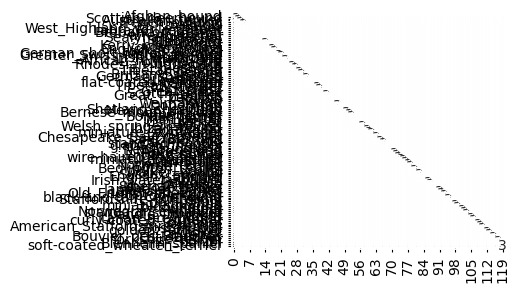

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

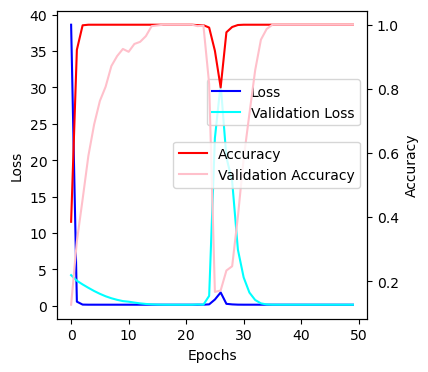

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

# ## CNN model inspired from OCP with 3 Conv layer 
### why not using RNN instead? 
##### --> RNNs are inferior to CNNs for most image processing tasks
##### https://stackoverflow.com/questions/49485480/classification-of-images-with-recurrent-neural-networks

### later use slighly different architecture from OCP/5097666-tp-implementez-votre-premier-reseau-de-neurones-avec-keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras import initializers, regularizers, layers

print("we use model with 3 conv layer each having 32, 64 and 128 filters, respectivelly")

model = Sequential()

# First Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.BatchNormalization())
model.add(Flatten())

initializer = initializers.HeNormal()
model.add(layers.Dense(512,activation="relu", kernel_initializer=initializer))
model.add(layers.Dense(512,activation="relu", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(20, activation='softmax'))  # Assuming 5 classes

model.summary()

In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data = (x_valid, y_valid))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

In [ ]:
stop

In [ ]:
plt.figure(1 , figsize = (5 , 12))

for i in range(9):
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(9, 1, i+1)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , np.argmax(pred, axis=1)[r[0]] ))
    plt.xticks([]) , plt.yticks([])

plt.show()



In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

# make OCP VGG16
#### https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5097666-tp-implementez-votre-premier-reseau-de-neurones-avec-keras
#### https://github.com/keras-team/keras/blob/master/keras/applications/vgg16.py

In [ ]:
import keras
from keras import layers, regularizers, optimizers, initializers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

my_VGG16.add(Conv2D(64, (3, 3), input_shape=(300, 300, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

initializer = initializers.HeNormal()
my_VGG16.add(layers.Dense(512,activation="relu", kernel_initializer=initializer))
my_VGG16.add(layers.Dense(512,activation="relu", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))

my_VGG16.add(Dense(20, activation='softmax'))

my_VGG16.summary()

my_VGG16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimizers.SGD(lr=0.001, momentum=0.9)


In [ ]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.75, random_state = 42)


history = my_VGG16.fit(x_train, y_train, epochs=50, batch_size=64, validation_data = (x_valid, y_valid))

# apprentissage super long!
-- 1 - changer regularizer en diminuant parameter par ordre de grandeur // aide pas
-- 2 - changer initializer to He Normal // aide pas
-- 3 - utiliser moins de classes et plus d'images
-- 4 - changer optimizer pour sgd //

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = my_VGG16.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

## use VGG16 od keras

In [2]:
path = "/kaggle/input/stanford-dogs-dataset/images/Images"

categories = os.listdir(path)
random.shuffle(categories)
categories = categories[:120]
labels_ = [cat[10:] for cat in categories]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02100735-English_setter', 'n02091467-Norwegian_elkhound', 'n02094114-Norfolk_terrier', 'n02095314-wire-haired_fox_terrier', 'n02102177-Welsh_springer_spaniel', 'n02108000-EntleBucher', 'n02086240-Shih-Tzu', 'n02108422-bull_mastiff', 'n02113712-miniature_poodle', 'n02098286-West_Highland_white_terrier', 'n02112018-Pomeranian', 'n02109525-Saint_Bernard', 'n02095889-Sealyham_terrier', 'n02102973-Irish_water_spaniel', 'n02092339-Weimaraner', 'n02110627-affenpinscher', 'n02086079-Pekinese', 'n02111277-Newfoundland', 'n02109961-Eskimo_dog', 'n02108915-French_bulldog', 'n02108551-Tibetan_mastiff', 'n02087046-toy_terrier', 'n02090379-redbone', 'n02106550-Rottweiler', 'n02097047-miniature_schnauzer', 'n02111500-Great_Pyrenees', 'n02101388-Brittany_spaniel', 'n02113978-Mexican_hairless', 'n02097130-giant_schnauzer', 'n02099429-curly-coated_retriever', 'n02106382-Bouvier_des_Flandres', 'n02099712-Labrador_retriever', 'n02107142-Doberman', 'n02094258-Norwich_terrier', 'n02

In [3]:
### how to use data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (up to 20 degrees)
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest',     # Fill mode for newly created pixels
    data_format='channels_last'
)

            
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in tqdm(enumerate(categories)):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        random.shuffle(images)
        images = images[:5]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'RGB')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((224, 224))
            
            #img_lst.append(np.array(resized_img))
            #labels.append(index)
            
            for i in np.arange(5):             # apply n random transformations
                angmented_img = datagen.random_transform(np.array(resized_img))
                img_lst.append(np.array(resized_img))
                labels.append(index)
            
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

No. of images loaded =  3000 
No. of labels loaded =  3000
<class 'list'> <class 'list'>


0      25
1      25
88     25
87     25
86     25
       ..
35     25
34     25
33     25
32     25
119    25
Length: 120, dtype: int64

In [4]:
images = np.array(images)
labels = np.array(labels)

images = images.astype(np.float32)                      #### not necessary if using image transfo function ?!?
labels = labels.astype(np.int32)                         #### not necessary ...
images = images/255

# split to learn model
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size = 0.75, random_state = 42, stratify=labels)

x_train = x_train.astype('float32')
y_train = y_train.astype('int32')

# split to test and to validate
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.4, random_state = 42, stratify=y_test)

x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
y_valid = y_valid.astype('int32')
y_test = y_test.astype('int32')



In [ ]:
y_train.shape

In [5]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras import Model, regularizers
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))





# Récupérer la sortie de ce réseau
x = model.output
x = Flatten(name="flatten")(x)
x = Dense(512, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
x = Dense(512, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
predictions = Dense(120, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

new_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
new_model.layers[0:-3]

In [10]:
from keras import optimizers
from keras.callbacks import EarlyStopping
for layer in new_model.layers[0:-3]:
    layer.trainable = False

new_model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer='adam', #optimizers.SGD(lr=0.001, momentum=0.9), 
                  metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) # 
model_info = new_model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=2, validation_data = (x_valid, y_valid), callbacks=[early_stop])

Epoch 1/50
36/36 - 16s - loss: 0.3067 - accuracy: 0.9996 - val_loss: 0.2254 - val_accuracy: 1.0000 - 16s/epoch - 432ms/step
Epoch 2/50
36/36 - 13s - loss: 0.1884 - accuracy: 0.9991 - val_loss: 0.1592 - val_accuracy: 1.0000 - 13s/epoch - 348ms/step
Epoch 3/50
36/36 - 12s - loss: 0.1400 - accuracy: 1.0000 - val_loss: 0.1242 - val_accuracy: 1.0000 - 12s/epoch - 339ms/step
Epoch 4/50
36/36 - 11s - loss: 0.1151 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 1.0000 - 11s/epoch - 311ms/step
Epoch 5/50
36/36 - 12s - loss: 0.1006 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 1.0000 - 12s/epoch - 326ms/step
Epoch 6/50
36/36 - 11s - loss: 0.0902 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 1.0000 - 11s/epoch - 307ms/step
Epoch 7/50
36/36 - 12s - loss: 0.0817 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 1.0000 - 12s/epoch - 329ms/step
Epoch 8/50
36/36 - 11s - loss: 0.0747 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 1.0000 - 11s/epoch - 313ms/step
Epoch 9/

10/10 [==============================] - 8s 336ms/step


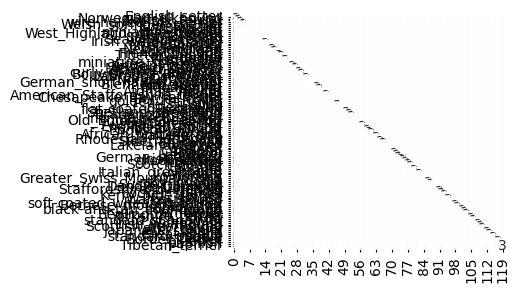

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

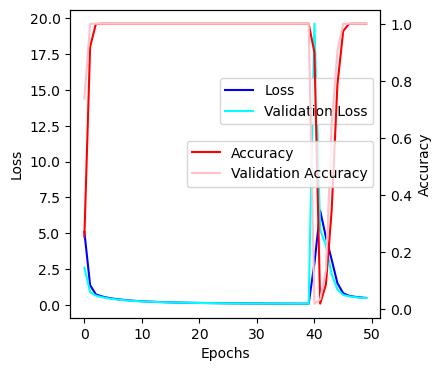

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = new_model.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(model_info.history['loss'], color='blue', label='Loss')
plt.plot(model_info.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(model_info.history['accuracy'], color='red', label='Accuracy')
plt.plot(model_info.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()